In [117]:
from bs4 import BeautifulSoup

import gzip

import json

import os
import glob

import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

import nltk

In [18]:
DIR_DATA = "/Users/andrekestler/Library/Mobile Documents/com~apple~CloudDocs/Library/Künstliche Intelligenz/1. Semester/Natural Language Processing/nlp-projekt/data/top100/"
DIR_TMP = "/Users/andrekestler/Library/Mobile Documents/com~apple~CloudDocs/Library/Künstliche Intelligenz/1. Semester/Natural Language Processing/nlp-projekt/tmp/"
CHARACTER_ENCODING = "UTF-8"

FILE = "2019-02-19_oldp_cases.json"
AMOUNT_OF_FILES = 10

DEBUG_FILE = "180229.txt"

In [19]:
# Unzip
import gzip
import shutil
with gzip.open(os.path.join(DIR_DATA, FILE + ".gz"), 'rb') as f_in:
    with open(os.path.join(DIR_TMP, FILE), 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [20]:
# Workaround Span-Issue - Ziemlich hacky
# <span>Hallo 
# => <span> Hallo
# </span>Hallo
# => </span> Hallo
# Wird nur in die .txt geschrieben, nicht in die .html
def addWhitespacesAfterEverySpanTag(soup):
    for index in soup.find_all('span'):
        index.append(" ")
    return soup

In [21]:
with open(os.path.join(DIR_TMP, FILE), mode="r", encoding=CHARACTER_ENCODING) as f:
    for _ in range(AMOUNT_OF_FILES):
        line = f.readline()
        parsed_line = json.loads(line)

        id = parsed_line["id"]
        content = parsed_line["content"]

        soup = BeautifulSoup(content, "lxml")

        # Mit Tags == Web
        fwrite = open(os.path.join(DIR_TMP, str(id) + ".html"), "w", encoding=CHARACTER_ENCODING)
        fwrite.write(str(soup))
        fwrite.close()

        # Ohne Tags == Soup
        soup = addWhitespacesAfterEverySpanTag(soup)

        fwrite = open(os.path.join(DIR_TMP, str(id) + ".txt"), "w", encoding=CHARACTER_ENCODING)
        fwrite.write(soup.text)
        fwrite.close()

In [22]:
with open(os.path.join(DIR_TMP, DEBUG_FILE), mode="r", encoding=CHARACTER_ENCODING) as f:
    content = f.read()
    print(content)

Tenor
Der Antrag der Kläger auf Zulassung der Berufung gegen das auf die mündliche Verhandlung vom 22.11.2018 ergangene Urteil des Verwaltungsgerichts Düsseldorf wird abgelehnt.
Die Kläger tragen die Kosten des Zulassungsverfahrens, für das Gerichtskosten nicht erhoben werden.
 
1 Der Antrag der Kläger auf Zulassung der Berufung hat keinen Erfolg.
2 Die Berufung ist nicht wegen der allein geltend gemachten grundsätzlichen Bedeutung der Rechtssache zuzulassen (§ 78 Abs. 3 Nr. 1 AsylG). Grundsätzliche Bedeutung im Sinne des § 78 Abs. 3 Nr. 1 AsylG hat eine Rechtssache nur dann, wenn sie eine bisher höchstrichterlich oder obergerichtlich nicht beantwortete Rechtsfrage oder eine im Bereich der Tatsachenfeststellung bisher obergerichtlich nicht geklärte Frage von allgemeiner Bedeutung aufwirft, die sich in dem angestrebten Berufungsverfahren stellen würde und die im Interesse der Einheitlichkeit der Rechtsprechung oder der Fortentwicklung des Rechts berufungsgerichtlicher Klärung bedarf. Fü

In [58]:
# pattern for Aufl., Art., x., X., ...
# wihout end of the sentence r'[A-Za-z]+\.{1,}\s'
pattern1 = r'\b[A-Za-z]+\.{1,}'

text = "Unter Art. 5 der Gesamtzahlen geht das. Die Nummer ist unter Aufl. 10 erschienen m. w. N. Test Gebühren."
print(re.findall(pattern1, text))


['Art.', 'das.', 'Aufl.', 'm.', 'w.', 'N.']


In [24]:
# pattern for x.x.X.
pattern2 = r'\b(?:[A-Za-z]\.){2,}'

text = "Extract only abreaviations like H.P. and I.B.M."
print(re.findall(pattern2, text))

['H.P.', 'I.B.M.']


In [25]:
# pattern for x. x. xxx.
pattern3 = r'\b(?:[A-Za-z]{1,}\.\s){1,}[A-Za-z]{1,}\.'

text = "Extract only abreaviations like H. P. and I. B. M. and some ime. le. like H. P. nun geht es auch weiter a. a. O. Rn. oder nicht"
print(re.findall(pattern3, text))

['H. P.', 'I. B. M.', 'ime. le.', 'H. P.', 'a. a. O. Rn.']


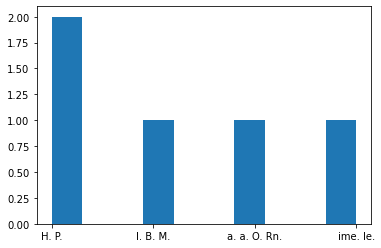

In [26]:
val, cnt = np.unique(re.findall(pattern3, text), return_counts=True)
plt.hist(val, weights=cnt)
plt.show()

In [69]:
pattern1 = r'\b[A-Za-z]+\.{1,}'
pattern2 = r'\b(?:[A-Za-z]\.){2,}'
pattern3 = r'\b(?:[A-Za-z]{1,}\.\s){1,}[A-Za-z]{1,}\.'

In [120]:
# read content
DIR_PATH = "/Users/andrekestler/Library/Mobile Documents/com~apple~CloudDocs/Library/Künstliche Intelligenz/1. Semester/Natural Language Processing/nlp-projekt/data/Dataset_Content/"
# DIR_PATH = "/Users/andrekestler/Library/Mobile Documents/com~apple~CloudDocs/Library/Künstliche Intelligenz/1. Semester/Natural Language Processing/nlp-projekt/tmp/"
lst_FILES = glob.glob(DIR_PATH+'*.txt')

found_pattern = []

for FILE in lst_FILES:
    with open(os.path.join(FILE), mode="r", encoding=CHARACTER_ENCODING) as f:
        content = f.read()
        
        found_pattern += re.findall(pattern1, content)
        found_pattern += re.findall(pattern2, content)
        found_pattern += re.findall(pattern3, content)
        
print("Found ", len(found_pattern), " patterns")

Found  20568209  patterns


In [121]:
corpus = nltk.corpus.ConllCorpusReader('.', 'tiger_release_aug07.corrected.16012013.conll09', ['ignore', 'words', 'ignore','ignore', 'pos'], encoding='utf-8')
lst_Vokabular = [token.lower()+"." for token in corpus.words()]

In [122]:
# 2. Möglichkeit zu zählen
cnt = Counter() 
cnt.update(found_pattern)
lst_MostCommon = cnt.most_common()

values = []
keys = []
for value, key in lst_MostCommon:
    if value.lower() not in lst_Vokabular:
        values.append(value)
        keys.append(key)

In [124]:
print("Len without corpus: ", len(lst_MostCommon))
print("Len with corpus: ", len(values))

Len without corpus:  192380
Len with corpus:  165552


In [128]:
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [10,10]
# for outline plot
%matplotlib qt

plt.bar(x=values[:100], height=keys[:100])
plt.show()

In [129]:
import seaborn as sns

sns.barplot(x=values[:100], y=keys[:100])

<AxesSubplot:>

In [ ]:
np.save("/Values.npy", values)
np.save("/Counts.npy", keys)